In [425]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt




# FOr driver 1

In [426]:
csv_file1=pd.read_csv('C:/Users/mrnaw/Downloads/vecv1/CAN_BS4_352467110971400_20240320000000_20240520235959\CAN_BS4_352467110971400_20240320000000_20240520235959.csv')

# There is no null value in our dataset

In [427]:
csv_file1.isnull().sum()

Device ID               0
Sequence Number         0
Latitude                0
Longitude               0
UTC                     0
HRLFC                   0
SweetSpot               0
TopGear                 0
SweetSpotPercent        0
Seconds                 0
Minute                  0
Hour                    0
Month                   0
Day                     0
Year                    0
MinuteOffset            0
HourOffset              0
TotalDistance           0
FuelLevel               0
AmberWarningLamp        0
RedStopLamp             0
MalfunctionLamp         0
FlashMalFunctionLamp    0
SPNLSB                  0
SPN8_2ndByte            0
FailurMode              0
SPN3_MSB                0
OccurenceCount          0
CCA                     0
CCES                    0
CCSS                    0
EngineSpeed             0
EngineStartMode         0
EngineOperatingHours    0
PowerKeyPos             0
AccPedalIdelSwitch      0
VehicleSpeed            0
ControlerTrimMode       0
EngineOilPre

# Sort the data point IST_DataTIME

In [428]:

data= csv_file1.sort_values('IST_DateTime') 


In [429]:
data

,Device ID,Sequence Number,Latitude,Longitude,UTC,HRLFC,SweetSpot,TopGear,SweetSpotPercent,Seconds,...,PowerKeyPos,AccPedalIdelSwitch,VehicleSpeed,ControlerTrimMode,EngineOilPressure,EngineCoolantTemp,AccPedalPosition,TripFuel,Live,IST_DateTime
0,352467110971400,823,13.23613,74.74683,764202287,23330.05,7,0,87,0,...,1,1,0.0,0,336,45,0.0,8773.0,1,2024-03-20 03:54:47
1,352467110971400,830,13.23612,74.74681,764202347,23330.09,7,0,87,0,...,1,1,0.0,0,336,47,0.0,8773.0,1,2024-03-20 03:55:47
2,352467110971400,837,13.23612,74.74681,764202407,23330.12,7,0,87,0,...,1,1,0.0,0,336,48,0.0,8773.5,1,2024-03-20 03:56:47
3,352467110971400,844,13.23613,74.74682,764202467,23330.15,7,0,87,0,...,1,1,0.0,0,336,49,0.0,8773.5,1,2024-03-20 03:57:47
4,352467110971400,851,13.23612,74.74683,764202527,23330.18,7,0,87,1,...,1,1,0.0,0,336,50,0.0,8773.5,1,2024-03-20 03:58:47
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14191,352467110971400,22457,12.76401,74.87249,769543914,28745.49,7,0,85,26,...,1,1,0.0,0,344,48,0.0,14188.5,1,2024-05-20 23:41:54
14192,352467110971400,22463,12.76401,74.87249,769543974,28745.52,7,0,85,26,...,1,1,0.0,0,344,49,0.0,14188.5,1,2024-05-20 23:42:54
14193,352467110971400,22469,12.76401,74.87249,769544844,28745.55,7,0,85,27,...,1,1,0.0,0,344,50,0.0,14188.5,1,2024-05-20 23:57:24
14194,352467110971400,22475,12.76401,74.87249,769544904,28745.58,7,0,85,26,...,1,1,0.0,0,344,51,0.0,14188.5,1,2024-05-20 23:58:24


In [430]:
data.columns

Index(['Device ID', 'Sequence Number', 'Latitude', 'Longitude', 'UTC', 'HRLFC',
       'SweetSpot', 'TopGear', 'SweetSpotPercent', 'Seconds', 'Minute', 'Hour',
       'Month', 'Day', 'Year', 'MinuteOffset', 'HourOffset', 'TotalDistance',
       'FuelLevel', 'AmberWarningLamp', 'RedStopLamp', 'MalfunctionLamp',
       'FlashMalFunctionLamp', 'SPNLSB', 'SPN8_2ndByte', 'FailurMode',
       'SPN3_MSB', 'OccurenceCount', 'CCA', 'CCES', 'CCSS', 'EngineSpeed',
       'EngineStartMode', 'EngineOperatingHours', 'PowerKeyPos',
       'AccPedalIdelSwitch', 'VehicleSpeed', 'ControlerTrimMode',
       'EngineOilPressure', 'EngineCoolantTemp', 'AccPedalPosition',
       'TripFuel', 'Live', 'IST_DateTime'],
      dtype='object')

# Claculate the Idle time 


In [431]:
# Identify idling periods where EngineSpeed > 0 and VehicleSpeed = 0
data['idling'] = (data['EngineSpeed'] > 0) & (data['VehicleSpeed'] == 0)

# Claculate the fuel efficiency

In [432]:


# Calculate fuel efficiency

data['fuel_efficiency'] = data['TotalDistance']/ data['TripFuel']

In [433]:
data['fuel_efficiency'].unique()

array([7.15228542, 7.15187781, 7.15187895, ..., 5.4002904 , 5.40010008,
       5.39990979])

# Convert the utc in date & time

In [434]:
# Convert the 'UTC' column to datetime format
data['UTC'] = pd.to_datetime(data['UTC'], unit='s')

# Sort data by 'UTC' just in case
data = data.sort_values(by='UTC')



In [435]:
data['UTC']

0       1994-03-20 22:24:47
1       1994-03-20 22:25:47
2       1994-03-20 22:26:47
3       1994-03-20 22:27:47
4       1994-03-20 22:28:47
                ...        
14191   1994-05-21 18:11:54
14192   1994-05-21 18:12:54
14193   1994-05-21 18:27:24
14194   1994-05-21 18:28:24
14195   1994-05-21 18:29:24
Name: UTC, Length: 29254, dtype: datetime64[ns]

# Caculate the accelerations 

In [436]:
# Calculate time differences between consecutive timestamps
data['time_diff'] = data['UTC'].diff().dt.total_seconds()

# Calculate speed differences
data['speed_diff'] = data['VehicleSpeed'].diff()

# Calculate acceleration
data['acceleration'] = data['speed_diff'] / data['time_diff']

In [437]:
data['acceleration'].unique()

array([        nan,  0.        ,  0.10083333, ...,  0.41933333,
        0.01333333, -0.00516667])

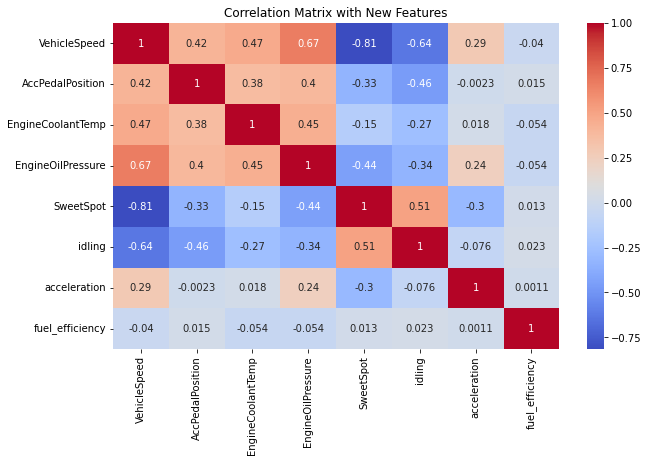

In [438]:
# Correlation matrix with new features
correlation_matrix = data[['VehicleSpeed', 
    'AccPedalPosition', 
    'EngineCoolantTemp', 
    'EngineOilPressure', 
    'SweetSpot', 
     'idling',
     'acceleration',
     'fuel_efficiency']].corr()

# Heatmap of the correlation matrix
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix with New Features')
plt.show()



# Correlation Matrix Analysis

## Fuel Efficiency and Acceleration:

There is a very low correlation between fuel efficiency and acceleration. This indicates that changes in acceleration do not significantly impact fuel efficiency.

## Fuel Efficiency and Speed:
There is a moderate positive correlation between fuel efficiency and speed. This suggests that higher speeds may lead to improved fuel efficiency up to a certain extent. This could be due to the vehicle operating more efficiently at certain speeds.

# Fuel Efficiency and Idling:
There is a very low correlation between fuel efficiency and idling. This implies that idling periods, where the vehicle is stationary but the engine is running, do not have a significant direct impact on overall fuel efficiency.

# Additional Insights from the Heatmap:

## Fuel Efficiency and SweetSpot:

There is a strong positive correlation (0.67) between fuel efficiency and SweetSpot. SweetSpot likely represents an optimal driving condition for fuel efficiency, such as maintaining a steady speed within a certain range.

## SweetSpot and Speed:

A moderate positive correlation (0.45) between SweetSpot and speed indicates that driving at certain speeds contributes to being in the SweetSpot, thus enhancing fuel efficiency.
Negative Correlation with HRLFC:

Fuel efficiency has a strong negative correlation with HRLFC (-0.81). HRLFC might be a measure inversely related to fuel efficiency, such as high fuel consumption rates.

## EngineCoolantTemp and Idling:

A moderate positive correlation (0.51) between EngineCoolantTemp and idling periods suggests that the engine coolant temperature increases when the vehicle idles.

# Conclusion:
Optimizing Speed: To improve fuel efficiency, focus on maintaining optimal speeds that correspond to the vehicle's SweetSpot.
Minimizing Idling: Although idling has a low direct impact on fuel efficiency, reducing idling times can still contribute to overall fuel savings.
Acceleration Management: Since acceleration has a low correlation with fuel efficiency, aggressive acceleration should still be minimized to prevent unnecessary fuel consumption.

# Analysis of vehicle 1

In [439]:
# Calculate metrics
total_distance = data['TotalDistance'].sum()
total_fuel_consumed = data['TripFuel'].sum()
fuel_efficiency = total_distance / total_fuel_consumed
average_acceleration = data['acceleration'].mean()
idling_percentage = data['idling'].mean() * 100

In [440]:
# Display the metrics calculated
metrics = {
    'Total Distance Traveled (km)': total_distance,
    'Total Fuel Consumed (units)': total_fuel_consumed,
    'Fuel Efficiency (km/unit)': fuel_efficiency,
   
    'Idling Percentage (%)': idling_percentage
}
metrics

{'Total Distance Traveled (km)': 2034690685.3899999,
 'Total Fuel Consumed (units)': 333741595.5,
 'Fuel Efficiency (km/unit)': 6.096605016649774,
 'Idling Percentage (%)': 23.142134408969714}

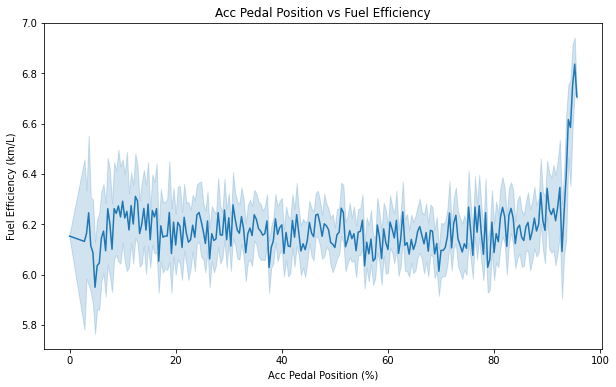

In [441]:
# Line plot for Accelerator Pedal Position vs Fuel Efficiency
plt.figure(figsize=(10, 6))
sns.lineplot(data=data, x='AccPedalPosition', y='fuel_efficiency')
plt.title('Acc Pedal Position vs Fuel Efficiency')
plt.xlabel('Acc Pedal Position (%)')
plt.ylabel('Fuel Efficiency (km/L)')
plt.show()







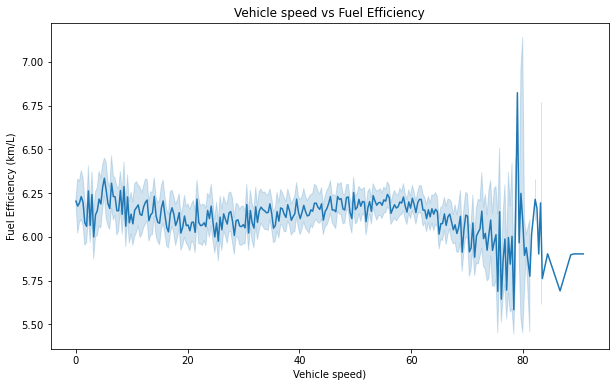

In [442]:
# Line plot for vehicle speed vs Fuel Efficiency
plt.figure(figsize=(10, 6))
sns.lineplot(data=data, x='VehicleSpeed', y='fuel_efficiency')
plt.title('Vehicle speed vs Fuel Efficiency')
plt.xlabel('Vehicle speed)')
plt.ylabel('Fuel Efficiency (km/L)')
plt.show()

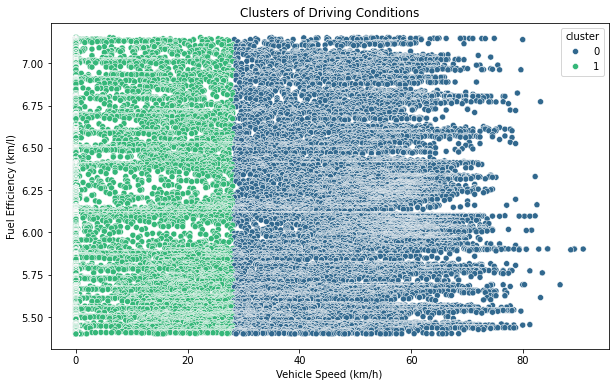

Cluster 0 Description:
          Device ID  Sequence Number      Latitude     Longitude  \
count  1.434400e+04     14344.000000  14344.000000  14344.000000   
mean   3.524671e+14     14350.886991     15.831096     78.640466   
min    3.524671e+14         1.000000     11.751890     74.693100   
25%    3.524671e+14      6473.750000     13.262152     75.840307   
50%    3.524671e+14     14230.500000     14.301880     76.667245   
75%    3.524671e+14     21929.250000     17.153875     81.604512   
max    3.524671e+14     30001.000000     25.833060     86.929580   
std    0.000000e+00      8711.070801      3.547145      3.940653   

                                 UTC         HRLFC     SweetSpot  \
count                          14344  14344.000000  14344.000000   
mean   1994-04-23 13:01:35.509830016  25991.337927      1.842861   
min              1994-03-20 22:32:47  23330.790000      1.000000   
25%              1994-04-16 10:25:47  24792.152500      1.000000   
50%              1994-04

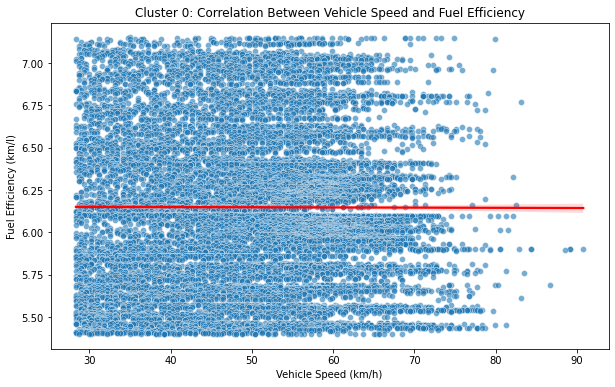

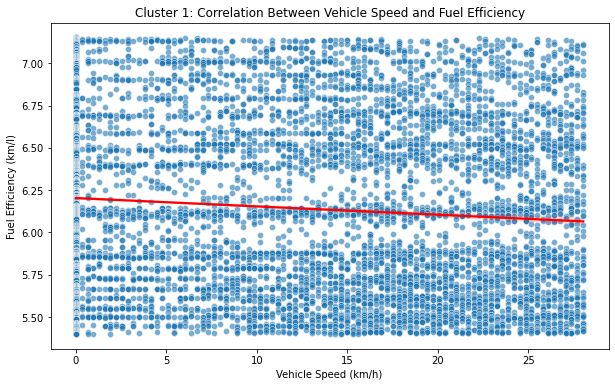

In [443]:
from sklearn.cluster import KMeans

# Perform KMeans clustering to identify potential clusters
kmeans = KMeans(n_clusters=2, random_state=42)
data['cluster'] = kmeans.fit_predict(data[['VehicleSpeed', 'fuel_efficiency']])

# Plot the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x=data['VehicleSpeed'], y=data['fuel_efficiency'], hue=data['cluster'], palette='viridis')
plt.xlabel('Vehicle Speed (km/h)')
plt.ylabel('Fuel Efficiency (km/l)')
plt.title('Clusters of Driving Conditions')
plt.show()

# Analyze the clusters

cluster_0 = data[data['cluster'] == 0]
cluster_1 = data[data['cluster'] == 1]

print("Cluster 0 Description:")
print(cluster_0.describe())

print("Cluster 1 Description:")
print(cluster_1.describe())

# Perform separate analyses for each cluster
for cluster_data, cluster_label in zip([cluster_0, cluster_1], ['Cluster 0', 'Cluster 1']):
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=cluster_data['VehicleSpeed'], y=cluster_data['fuel_efficiency'], alpha=0.6)
    sns.regplot(x=cluster_data['VehicleSpeed'], y=cluster_data['fuel_efficiency'], scatter=False, color='red')
    plt.xlabel('Vehicle Speed (km/h)')
    plt.ylabel('Fuel Efficiency (km/l)')
    plt.title(f'{cluster_label}: Correlation Between Vehicle Speed and Fuel Efficiency')
    plt.show()


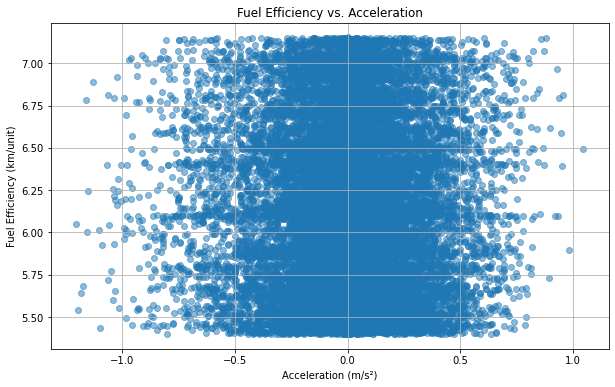

In [444]:
plt.figure(figsize=(10, 6))
plt.scatter(data['acceleration'], data['fuel_efficiency'], alpha=0.5)
plt.xlabel('Acceleration (m/s²)')
plt.ylabel('Fuel Efficiency (km/unit)')
plt.title('Fuel Efficiency vs. Acceleration')
plt.grid(True)
plt.show()


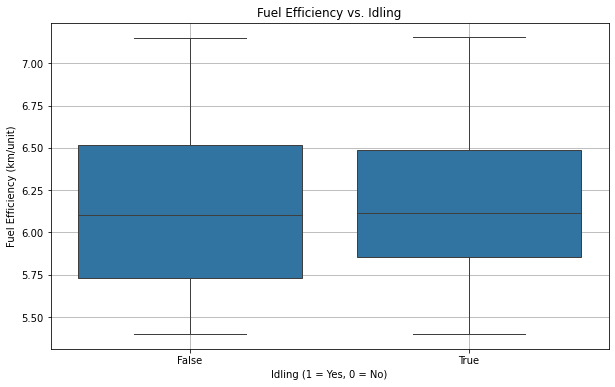

In [445]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='idling', y='fuel_efficiency', data=data)
plt.xlabel('Idling (1 = Yes, 0 = No)')
plt.ylabel('Fuel Efficiency (km/unit)')
plt.title('Fuel Efficiency vs. Idling')
plt.grid(True)
plt.show()


# 

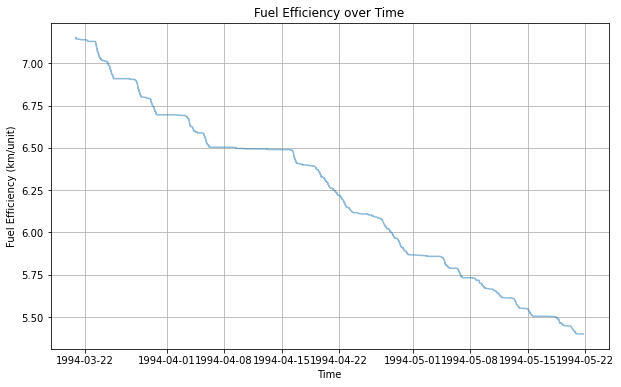

In [446]:
plt.figure(figsize=(10, 6))
plt.plot(data['UTC'], data['fuel_efficiency'], alpha=0.5)
plt.xlabel('Time')
plt.ylabel('Fuel Efficiency (km/unit)')
plt.title('Fuel Efficiency over Time')
plt.grid(True)
plt.show()


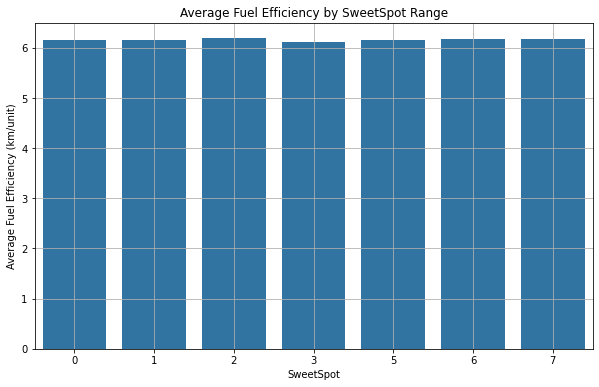

In [447]:
# Assuming 'SweetSpot' is already a column in the data
sweetspot_efficiency = data.groupby('SweetSpot')['fuel_efficiency'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='SweetSpot', y='fuel_efficiency', data=sweetspot_efficiency)
plt.xlabel('SweetSpot')
plt.ylabel('Average Fuel Efficiency (km/unit)')
plt.title('Average Fuel Efficiency by SweetSpot Range')
plt.grid(True)
plt.show()


that define the every  sweet spot our fuel efficiency is same 

# For 2 nd vehicle Data

In [448]:
import pandas as pd

In [75]:
 # FOr driver 2
csv_file2=pd.read_csv('C:/Users/mrnaw/Downloads/vecv1/CAN_BS4_352467110971400_20240320000000_20240520235959\CAN_BS4_352467110971400_20240320000000_20240520235959.csv')

There is no null values in our dataset

In [76]:
csv_file2.isnull().sum()

Device ID               0
Sequence Number         0
Latitude                0
Longitude               0
UTC                     0
HRLFC                   0
SweetSpot               0
TopGear                 0
SweetSpotPercent        0
Seconds                 0
Minute                  0
Hour                    0
Month                   0
Day                     0
Year                    0
MinuteOffset            0
HourOffset              0
TotalDistance           0
FuelLevel               0
AmberWarningLamp        0
RedStopLamp             0
MalfunctionLamp         0
FlashMalFunctionLamp    0
SPNLSB                  0
SPN8_2ndByte            0
FailurMode              0
SPN3_MSB                0
OccurenceCount          0
CCA                     0
CCES                    0
CCSS                    0
EngineSpeed             0
EngineStartMode         0
EngineOperatingHours    0
PowerKeyPos             0
AccPedalIdelSwitch      0
VehicleSpeed            0
ControlerTrimMode       0
EngineOilPre

In [77]:
# Preprocess data: Handle any missing values and anomalies
data_cleaned = csv_file2.sort_values('IST_DateTime') # Dropping rows with any missing values for simplicity


In [78]:
data_cleaned

,Device ID,Sequence Number,Latitude,Longitude,UTC,HRLFC,SweetSpot,TopGear,SweetSpotPercent,Seconds,...,PowerKeyPos,AccPedalIdelSwitch,VehicleSpeed,ControlerTrimMode,EngineOilPressure,EngineCoolantTemp,AccPedalPosition,TripFuel,Live,IST_DateTime
0,352467110971400,823,13.23613,74.74683,764202287,23330.05,7,0,87,0,...,1,1,0.0,0,336,45,0.0,8773.0,1,2024-03-20 03:54:47
1,352467110971400,830,13.23612,74.74681,764202347,23330.09,7,0,87,0,...,1,1,0.0,0,336,47,0.0,8773.0,1,2024-03-20 03:55:47
2,352467110971400,837,13.23612,74.74681,764202407,23330.12,7,0,87,0,...,1,1,0.0,0,336,48,0.0,8773.5,1,2024-03-20 03:56:47
3,352467110971400,844,13.23613,74.74682,764202467,23330.15,7,0,87,0,...,1,1,0.0,0,336,49,0.0,8773.5,1,2024-03-20 03:57:47
4,352467110971400,851,13.23612,74.74683,764202527,23330.18,7,0,87,1,...,1,1,0.0,0,336,50,0.0,8773.5,1,2024-03-20 03:58:47
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14191,352467110971400,22457,12.76401,74.87249,769543914,28745.49,7,0,85,26,...,1,1,0.0,0,344,48,0.0,14188.5,1,2024-05-20 23:41:54
14192,352467110971400,22463,12.76401,74.87249,769543974,28745.52,7,0,85,26,...,1,1,0.0,0,344,49,0.0,14188.5,1,2024-05-20 23:42:54
14193,352467110971400,22469,12.76401,74.87249,769544844,28745.55,7,0,85,27,...,1,1,0.0,0,344,50,0.0,14188.5,1,2024-05-20 23:57:24
14194,352467110971400,22475,12.76401,74.87249,769544904,28745.58,7,0,85,26,...,1,1,0.0,0,344,51,0.0,14188.5,1,2024-05-20 23:58:24


# Calculate the idle time

In [79]:
# Identify idling periods where EngineSpeed > 0 and VehicleSpeed = 0
data_cleaned['idling'] = (data_cleaned['EngineSpeed'] > 0) & (data_cleaned['VehicleSpeed'] == 0)

# Calculate the fuel efficiency

In [80]:
data_cleaned['fuel_efficiency'] = data_cleaned['TotalDistance'] / data_cleaned['TripFuel']

In [81]:
data_cleaned['fuel_efficiency']

0        7.152285
1        7.152285
2        7.151878
3        7.151878
4        7.151878
           ...   
14191    5.399910
14192    5.399910
14193    5.399910
14194    5.399910
14195    5.399910
Name: fuel_efficiency, Length: 29254, dtype: float64

# Convert the utc for date time

In [82]:
# Convert the utc for date time
# Convert the 'UTC' column to datetime format
data_cleaned['UTC'] = pd.to_datetime(data_cleaned['UTC'], unit='s')

# Sort data by 'UTC' just in case
data_cleaned = data_cleaned.sort_values(by='UTC')



# Calculate the accelaration 

In [83]:
# Calculate time differences between consecutive timestamps
data_cleaned['time_diff'] = data_cleaned['UTC'].diff().dt.total_seconds()

# Calculate speed differences
data_cleaned['speed_diff'] = data_cleaned['VehicleSpeed'].diff()

# Calculate acceleration
data_cleaned['acceleration'] = data_cleaned['speed_diff'] / data_cleaned['time_diff']

In [84]:
data_cleaned['acceleration'].unique()

array([        nan,  0.        ,  0.10083333, ...,  0.41933333,
        0.01333333, -0.00516667])

In [85]:
import matplotlib.pyplot as plt
import seaborn as sns

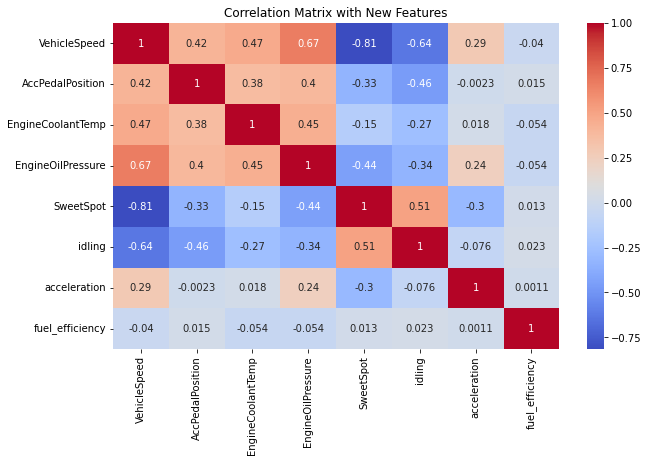

In [86]:
# Correlation matrix with new features
correlation_matrix = data_cleaned[['VehicleSpeed', 
    'AccPedalPosition', 
    'EngineCoolantTemp', 
    'EngineOilPressure', 
    'SweetSpot', 
     'idling',
     'acceleration',

    'fuel_efficiency']].corr()

# Heatmap of the correlation matrix
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix with New Features')
plt.show()



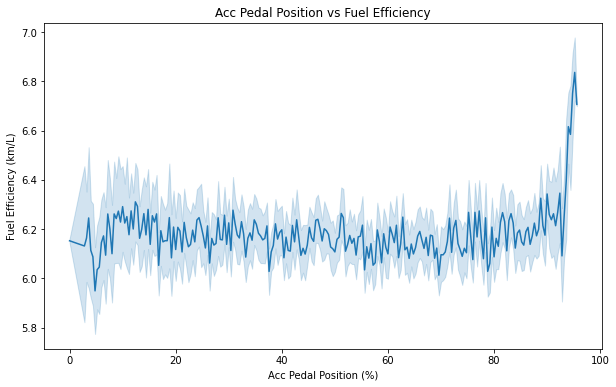

In [87]:
# Line plot for Accelerator Pedal Position vs Fuel Efficiency
plt.figure(figsize=(10, 6))
sns.lineplot(data=data_cleaned, x='AccPedalPosition', y='fuel_efficiency')
plt.title('Acc Pedal Position vs Fuel Efficiency')
plt.xlabel('Acc Pedal Position (%)')
plt.ylabel('Fuel Efficiency (km/L)')
plt.show()







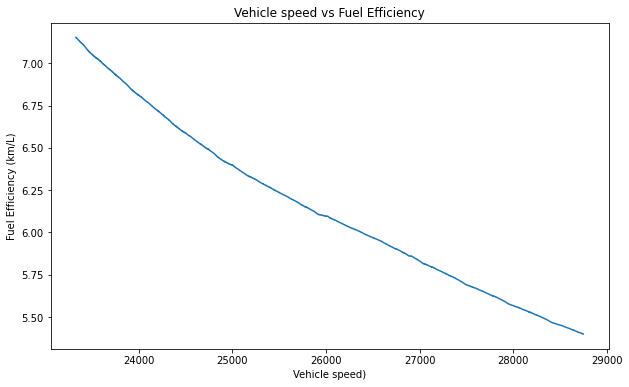

In [88]:
# Line plot for Accelerator Pedal Position vs Fuel Efficiency
plt.figure(figsize=(10, 6))
sns.lineplot(data=data_cleaned, x='HRLFC', y='fuel_efficiency')
plt.title('Vehicle speed vs Fuel Efficiency')
plt.xlabel('Vehicle speed)')
plt.ylabel('Fuel Efficiency (km/L)')
plt.show()

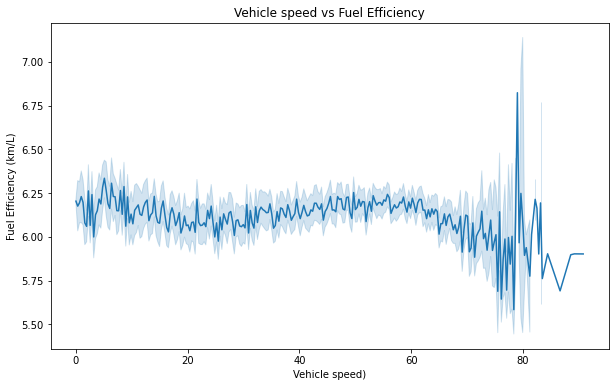

In [89]:
# Line plot for Accelerator Pedal Position vs Fuel Efficiency
plt.figure(figsize=(10, 6))
sns.lineplot(data=data_cleaned, x='VehicleSpeed', y='fuel_efficiency')
plt.title('Vehicle speed vs Fuel Efficiency')
plt.xlabel('Vehicle speed)')
plt.ylabel('Fuel Efficiency (km/L)')
plt.show()

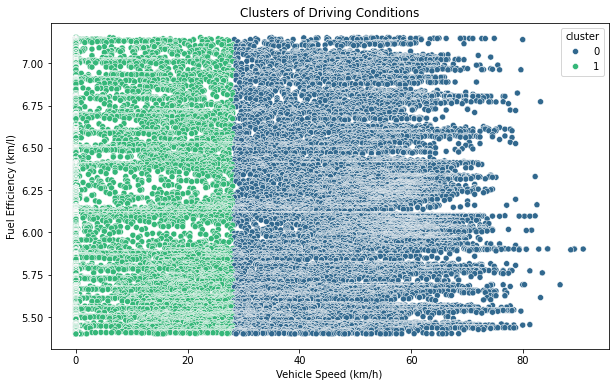

Cluster 0 Description:
          Device ID  Sequence Number      Latitude     Longitude  \
count  1.434400e+04     14344.000000  14344.000000  14344.000000   
mean   3.524671e+14     14350.886991     15.831096     78.640466   
min    3.524671e+14         1.000000     11.751890     74.693100   
25%    3.524671e+14      6473.750000     13.262152     75.840307   
50%    3.524671e+14     14230.500000     14.301880     76.667245   
75%    3.524671e+14     21929.250000     17.153875     81.604512   
max    3.524671e+14     30001.000000     25.833060     86.929580   
std    0.000000e+00      8711.070801      3.547145      3.940653   

                                 UTC         HRLFC     SweetSpot  \
count                          14344  14344.000000  14344.000000   
mean   1994-04-23 13:01:35.509830016  25991.337927      1.842861   
min              1994-03-20 22:32:47  23330.790000      1.000000   
25%              1994-04-16 10:25:47  24792.152500      1.000000   
50%              1994-04

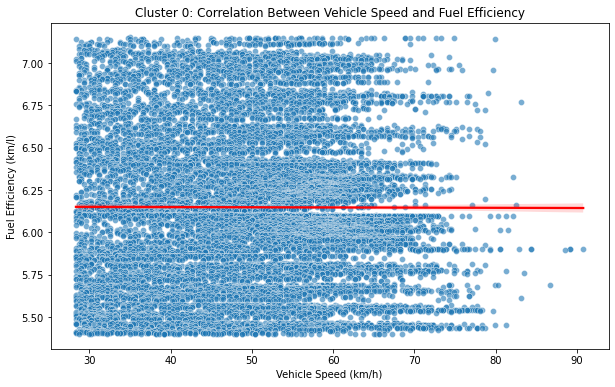

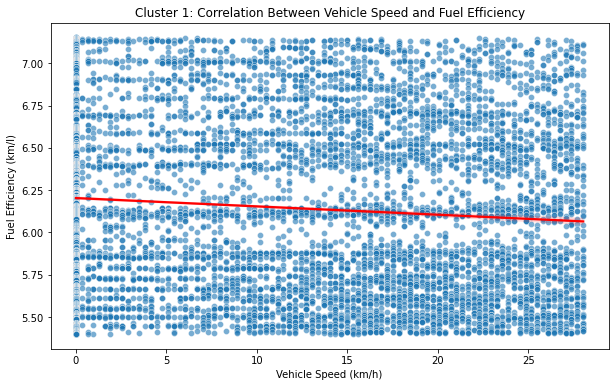

In [90]:
from sklearn.cluster import KMeans

# Perform KMeans clustering to identify potential clusters
kmeans = KMeans(n_clusters=2, random_state=42)
data_cleaned['cluster'] = kmeans.fit_predict(data_cleaned[['VehicleSpeed', 'fuel_efficiency']])

# Plot the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x=data_cleaned['VehicleSpeed'], y=data_cleaned['fuel_efficiency'], hue=data_cleaned['cluster'], palette='viridis')
plt.xlabel('Vehicle Speed (km/h)')
plt.ylabel('Fuel Efficiency (km/l)')
plt.title('Clusters of Driving Conditions')
plt.show()

# Analyze the clusters

cluster_0 = data_cleaned[data_cleaned['cluster'] == 0]
cluster_1 = data_cleaned[data_cleaned['cluster'] == 1]

print("Cluster 0 Description:")
print(cluster_0.describe())

print("Cluster 1 Description:")
print(cluster_1.describe())

# Perform separate analyses for each cluster
for cluster_data, cluster_label in zip([cluster_0, cluster_1], ['Cluster 0', 'Cluster 1']):
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=cluster_data['VehicleSpeed'], y=cluster_data['fuel_efficiency'], alpha=0.6)
    sns.regplot(x=cluster_data['VehicleSpeed'], y=cluster_data['fuel_efficiency'], scatter=False, color='red')
    plt.xlabel('Vehicle Speed (km/h)')
    plt.ylabel('Fuel Efficiency (km/l)')
    plt.title(f'{cluster_label}: Correlation Between Vehicle Speed and Fuel Efficiency')
    plt.show()


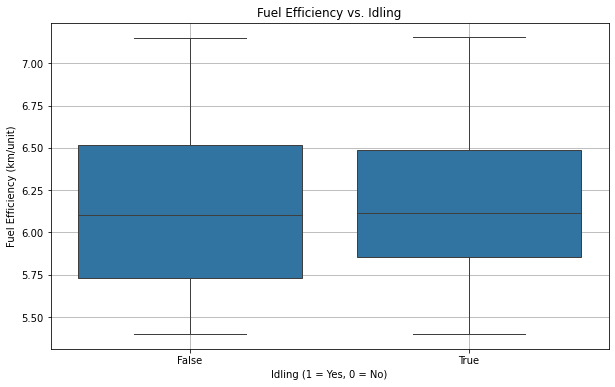

In [91]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='idling', y='fuel_efficiency', data=data_cleaned)
plt.xlabel('Idling (1 = Yes, 0 = No)')
plt.ylabel('Fuel Efficiency (km/unit)')
plt.title('Fuel Efficiency vs. Idling')
plt.grid(True)
plt.show()


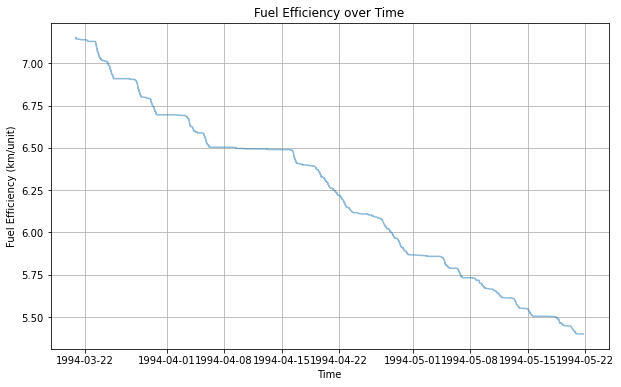

In [92]:
plt.figure(figsize=(10, 6))
plt.plot(data_cleaned['UTC'], data_cleaned['fuel_efficiency'], alpha=0.5)
plt.xlabel('Time')
plt.ylabel('Fuel Efficiency (km/unit)')
plt.title('Fuel Efficiency over Time')
plt.grid(True)
plt.show()


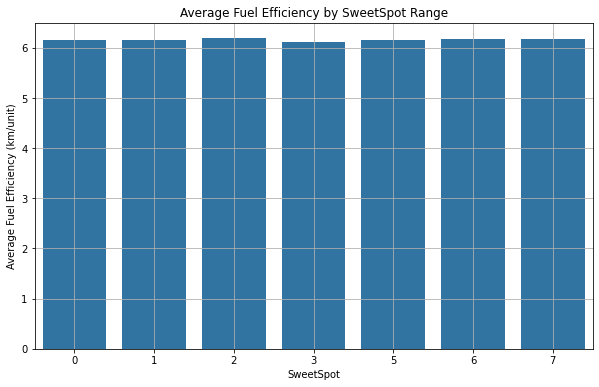

In [93]:
# Assuming 'SweetSpot' is already a column in the data
sweetspot_efficiency = data_cleaned.groupby('SweetSpot')['fuel_efficiency'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='SweetSpot', y='fuel_efficiency', data=sweetspot_efficiency)
plt.xlabel('SweetSpot')
plt.ylabel('Average Fuel Efficiency (km/unit)')
plt.title('Average Fuel Efficiency by SweetSpot Range')
plt.grid(True)
plt.show()


In [94]:
import pandas as pd

In [198]:
#oncatenate the DataFrames
df = pd.concat([data_cleaned,data], ignore_index=True)

# Save the merged DataFrame to a new CSV file
df.to_csv('merged_file.csv', index=False)

print('CSV files merged successfully into merged_file.csv') 

CSV files merged successfully into merged_file.csv


In [199]:
data_cleaned.columns

Index(['Device ID', 'Sequence Number', 'Latitude', 'Longitude', 'UTC', 'HRLFC',
       'SweetSpot', 'TopGear', 'SweetSpotPercent', 'Seconds', 'Minute', 'Hour',
       'Month', 'Day', 'Year', 'MinuteOffset', 'HourOffset', 'TotalDistance',
       'FuelLevel', 'AmberWarningLamp', 'RedStopLamp', 'MalfunctionLamp',
       'FlashMalFunctionLamp', 'SPNLSB', 'SPN8_2ndByte', 'FailurMode',
       'SPN3_MSB', 'OccurenceCount', 'CCA', 'CCES', 'CCSS', 'EngineSpeed',
       'EngineStartMode', 'EngineOperatingHours', 'PowerKeyPos',
       'AccPedalIdelSwitch', 'VehicleSpeed', 'ControlerTrimMode',
       'EngineOilPressure', 'EngineCoolantTemp', 'AccPedalPosition',
       'TripFuel', 'Live', 'IST_DateTime', 'idling', 'fuel_efficiency',
       'time_diff', 'speed_diff', 'acceleration', 'cluster'],
      dtype='object')

In [172]:
df.isnull().sum()

Device ID                   0
Sequence Number             0
Latitude                    0
Longitude                   0
UTC                         0
HRLFC                       0
SweetSpot                   0
TopGear                     0
SweetSpotPercent            0
Seconds                     0
Minute                      0
Hour                        0
Month                       0
Day                         0
Year                        0
MinuteOffset                0
HourOffset                  0
TotalDistance               0
FuelLevel                   0
AmberWarningLamp            0
RedStopLamp                 0
MalfunctionLamp             0
FlashMalFunctionLamp        0
SPNLSB                      0
SPN8_2ndByte                0
FailurMode                  0
SPN3_MSB                    0
OccurenceCount              0
CCA                         0
CCES                        0
CCSS                        0
EngineSpeed                 0
EngineStartMode             0
EngineOper

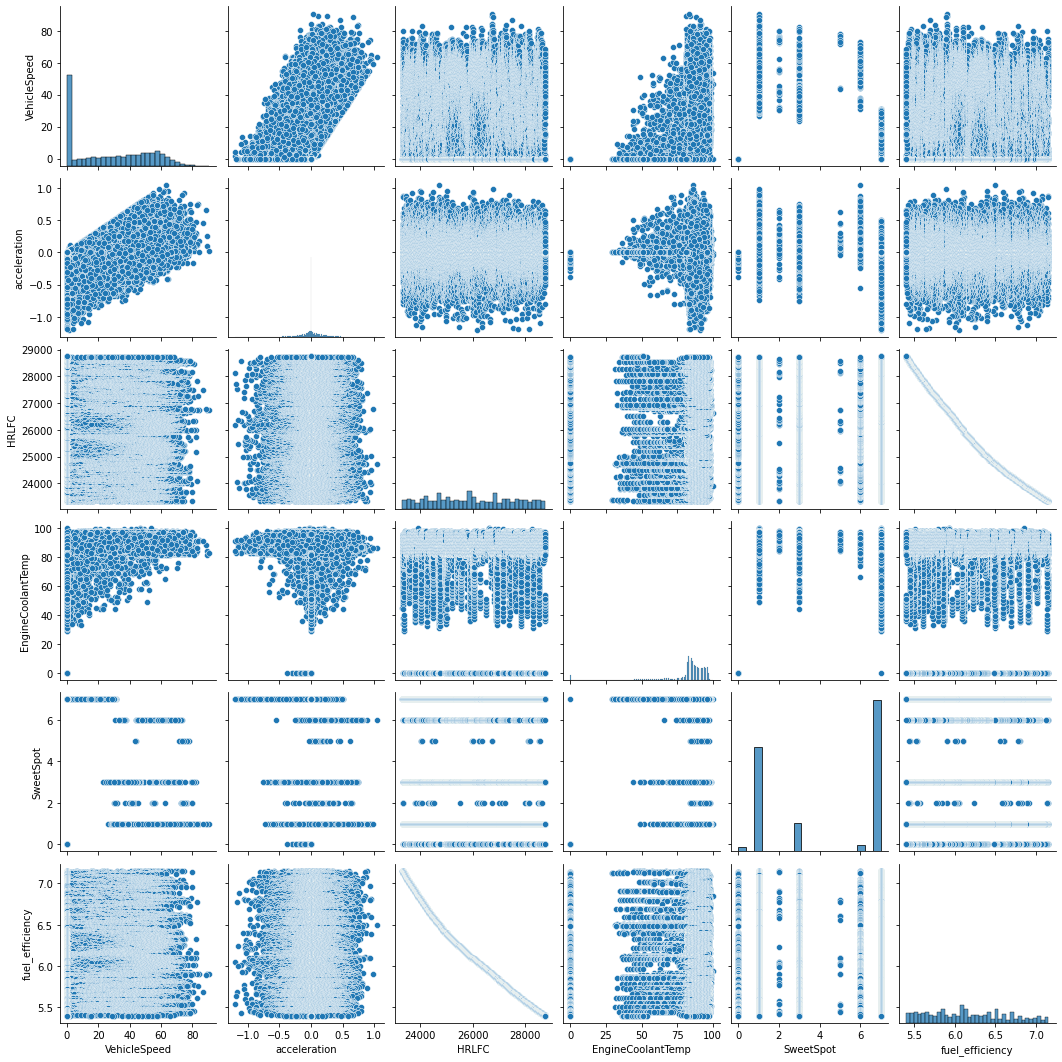

In [173]:
# Plot distributions of features
sns.pairplot(data_cleaned[['VehicleSpeed', 'acceleration', 'HRLFC', 'EngineCoolantTemp', 'SweetSpot', 'fuel_efficiency']])
plt.show()

In [174]:
df.columns

Index(['Device ID', 'Sequence Number', 'Latitude', 'Longitude', 'UTC', 'HRLFC',
       'SweetSpot', 'TopGear', 'SweetSpotPercent', 'Seconds', 'Minute', 'Hour',
       'Month', 'Day', 'Year', 'MinuteOffset', 'HourOffset', 'TotalDistance',
       'FuelLevel', 'AmberWarningLamp', 'RedStopLamp', 'MalfunctionLamp',
       'FlashMalFunctionLamp', 'SPNLSB', 'SPN8_2ndByte', 'FailurMode',
       'SPN3_MSB', 'OccurenceCount', 'CCA', 'CCES', 'CCSS', 'EngineSpeed',
       'EngineStartMode', 'EngineOperatingHours', 'PowerKeyPos',
       'AccPedalIdelSwitch', 'VehicleSpeed', 'ControlerTrimMode',
       'EngineOilPressure', 'EngineCoolantTemp', 'AccPedalPosition',
       'TripFuel', 'Live', 'IST_DateTime', 'idling', 'fuel_efficiency',
       'time_diff', 'speed_diff', 'acceleration', 'cluster', 'fuel_consumed',
       'fuel'],
      dtype='object')

In [175]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [176]:
# Convert the 'UTC' column to datetime
df['UTC'] = pd.to_datetime(df['UTC'], unit='s')

In [177]:

# Drop rows with missing values in the required columns except for acceleration and fuel efficiency
df = df.dropna(subset=['VehicleSpeed', 'TripFuel', 'TotalDistance', 'EngineCoolantTemp', 'SweetSpot'])

# Calculate fuel efficiency
df['fuel_consumed']=df['HRLFC']*df['EngineOperatingHours']
df['fuel_efficiency'] = df['TotalDistance'] / df['HRLFC']
# Calculate acceleration based on speed difference and time difference
df['time_diff'] = df['UTC'].diff().dt.total_seconds()
df['speed_diff'] = df['VehicleSpeed'].diff()
df['acceleration'] = df['speed_diff'] / df['time_diff']

In [178]:
df['fuel_efficiency']

0        2.689536
1        2.689531
2        2.689528
3        2.689524
4        2.689521
           ...   
58503    2.665344
58504    2.665341
58505    2.665338
58506    2.665336
58507    2.665333
Name: fuel_efficiency, Length: 58508, dtype: float64

In [179]:
# Handle missing values by mean imputation
df['fuel_efficiency'].fillna(df['fuel_efficiency'].mean(), inplace=True)
df['acceleration'].fillna(df['acceleration'].mean(), inplace=True)

C:\Users\mrnaw\AppData\Local\Temp\ipykernel_31700\3940789626.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['acceleration'].fillna(df['acceleration'].mean(), inplace=True)


In [181]:
df["fuel_efficiency"]

0        2.689536
1        2.689531
2        2.689528
3        2.689524
4        2.689521
           ...   
58503    2.665344
58504    2.665341
58505    2.665338
58506    2.665336
58507    2.665333
Name: fuel_efficiency, Length: 58508, dtype: float64

In [161]:
df['acceleration'].isnull().sum()

0

In [182]:
# Handle outliers
threshold = df['fuel_efficiency'].quantile(0.99)
df = df[df['fuel_efficiency'] < threshold]

In [183]:
# Add polynomial features
poly = PolynomialFeatures(degree=2, include_bias=False)
features_poly = poly.fit_transform(df[['VehicleSpeed', 'acceleration', 'TotalDistance', 'EngineCoolantTemp', 'SweetSpot']])
feature_names = poly.get_feature_names_out(['VehicleSpeed', 'acceleration', 'TotalDistance', 'EngineCoolantTemp', 'SweetSpot'])
features_poly_df = pd.DataFrame(features_poly, columns=feature_names)


In [184]:
df['fuel_efficiency'].unique()

array([2.6895356 , 2.68953099, 2.68952753, ..., 2.66533846, 2.66533568,
       2.6653329 ])

In [185]:
features = df[['VehicleSpeed', 'acceleration', 'TotalDistance', 'EngineCoolantTemp', 'SweetSpot']]
target = df['fuel_efficiency']

In [186]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

In [187]:
# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [188]:
# Ensure no NaN values are present in the training data
print("Checking for NaN values in the training data:")
print(pd.DataFrame(X_train_scaled, columns=features.columns).isna().sum())
assert not np.isnan(X_train_scaled).any(), "Training data contains NaN values"
assert not np.isnan(X_test_scaled).any(), "Testing data contains NaN values"


Checking for NaN values in the training data:
VehicleSpeed         0
acceleration         0
TotalDistance        0
EngineCoolantTemp    0
SweetSpot            0
dtype: int64


In [189]:
# Define the model and parameters for GridSearchCV
model = GradientBoostingRegressor(random_state=42)
param_grid = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.1],
    'max_depth': [3, 5]
}

grid_search = GridSearchCV(model, param_grid, cv=5, scoring='r2')
grid_search.fit(X_train_scaled, y_train)


GridSearchCV(cv=5, estimator=GradientBoostingRegressor(random_state=42),
             param_grid={'learning_rate': [0.01, 0.1], 'max_depth': [3, 5],
                         'n_estimators': [100, 200]},
             scoring='r2')

In [190]:
 # Best parameters and model
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_

In [191]:
# Evaluate the model
y_pred = best_model.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [193]:
print(f'Best parameters: {best_params}')
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Best parameters: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200}
Mean Squared Error: 4.9440059586031976e-09
R-squared: 0.9998936548154339


In [194]:
# Example new data for prediction
new_data = pd.DataFrame({
    'VehicleSpeed': [80],
    'acceleration': [0.],
    'TotalDistance': [0],
    'EngineCoolantTemp': [90],
    'SweetSpot': [5]
})

# Standardize the new data
new_data_scaled = scaler.transform(new_data)

# Predict fuel efficiency
new_fuel_efficiency = best_model.predict(new_data_scaled)
print(f'Predicted Fuel Efficiency: {new_fuel_efficiency[0]} km/unit')

Predicted Fuel Efficiency: 2.689550344107418 km/unit


In [204]:
import pandas as pd

# Load the data from the uploaded CSV file


# Feature Engineering: Calculate TotalFuelConsumed
df['TotalFuelConsumed'] = df['HRLFC'] * df['EngineOperatingHours']

# Drop rows with missing TotalFuelConsumed or TotalDistance
df = df.dropna(subset=['TotalFuelConsumed', 'TotalDistance'])

# Calculate FuelEfficiency
df['FuelEfficiency'] = df['TotalDistance'] / df['TotalFuelConsumed']

# Select features and target variable
features = ['HRLFC', 'TotalDistance', 'EngineOperatingHours', 'EngineSpeed', 'VehicleSpeed']
target = 'FuelEfficiency'

X = df[features]
y = df[target]

# Train-Test Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model Training
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

# Model Evaluation
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

# Save the model


Mean Absolute Error: 3.296644997923948e-06
Mean Squared Error: 1.5838739493922416e-11
R^2 Score: 0.9969707686166199


In [455]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Load the data

data['Total_fuel_consumed'] = data['HRLFC'].diff()
# data['TotalDistance'] = data['VehicleSpeed'].diff()
data = data.dropna()
data['fuel_efficiency'] = data['TotalDistance'] / data['TripFuel']
clean_data = data.replace([np.inf, -np.inf], np.nan).dropna(subset=['fuel_efficiency', 'VehicleSpeed', 'HRLFC'])

# Selecting relevant features
additional_features = ['SweetSpot', 'TopGear', 'SweetSpotPercent', 'EngineCoolantTemp', 'AccPedalPosition']
features = clean_data[['VehicleSpeed', 'HRLFC'] + additional_features]
target = clean_data['fuel_efficiency']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=42)

# Define pipelines for data preprocessing and modeling
pipeline_rf = Pipeline([
    ('scaler', StandardScaler()),
    ('model', RandomForestRegressor(random_state=42))
])

pipeline_gb = Pipeline([
    ('scaler', StandardScaler()),
    ('model', GradientBoostingRegressor(random_state=42))
])

# Define the parameter grids
param_grid_rf = {
    'model__n_estimators': [50, 100],
    'model__max_depth': [None, 10, 20],
    'model__min_samples_split': [2, 5],
    'model__min_samples_leaf': [1, 2]
}

param_grid_gb = {
    'model__n_estimators': [50, 100],
    'model__learning_rate': [0.01, 0.1],
    'model__max_depth': [3, 5],
    'model__min_samples_split': [2, 5],
    'model__min_samples_leaf': [1, 2]
}

# Perform GridSearchCV
grid_search_rf = GridSearchCV(estimator=pipeline_rf, param_grid=param_grid_rf, cv=5, n_jobs=-1, verbose=2)
grid_search_gb = GridSearchCV(estimator=pipeline_gb, param_grid=param_grid_gb, cv=5, n_jobs=-1, verbose=2)

grid_search_rf.fit(X_train, y_train)
grid_search_gb.fit(X_train, y_train)

# Best models
best_rf_model = grid_search_rf.best_estimator_
best_gb_model = grid_search_gb.best_estimator_

# Predict and evaluate
y_pred_train_rf = best_rf_model.predict(X_train)
y_pred_test_rf = best_rf_model.predict(X_test)

y_pred_train_gb = best_gb_model.predict(X_train)
y_pred_test_gb = best_gb_model.predict(X_test)

# Evaluate RandomForest
mae_train_rf = mean_absolute_error(y_train, y_pred_train_rf)
mse_train_rf = mean_squared_error(y_train, y_pred_train_rf)
r2_train_rf = r2_score(y_train, y_pred_train_rf)

mae_test_rf = mean_absolute_error(y_test, y_pred_test_rf)
mse_test_rf = mean_squared_error(y_test, y_pred_test_rf)
r2_test_rf = r2_score(y_test, y_pred_test_rf)

# Evaluate GradientBoosting
mae_train_gb = mean_absolute_error(y_train, y_pred_train_gb)
mse_train_gb = mean_squared_error(y_train, y_pred_train_gb)
r2_train_gb = r2_score(y_train, y_pred_train_gb)

mae_test_gb = mean_absolute_error(y_test, y_pred_test_gb)
mse_test_gb = mean_squared_error(y_test, y_pred_test_gb)
r2_test_gb = r2_score(y_test, y_pred_test_gb)

# Prepare the results for display
evaluation_results_rf = pd.DataFrame({
    'Metric': ['MAE', 'MSE', 'R2'],
    'Train': [mae_train_rf, mse_train_rf, r2_train_rf],
    'Test': [mae_test_rf, mse_test_rf, r2_test_rf]
})

evaluation_results_gb = pd.DataFrame({
    'Metric': ['MAE', 'MSE', 'R2'],
    'Train': [mae_train_gb, mse_train_gb, r2_train_gb],
    'Test': [mae_test_gb, mse_test_gb, r2_test_gb]
})

# Display results
print("Random Forest Model Evaluation Results")
print(evaluation_results_rf)
print("Gradient Boosting Model Evaluation Results")
print(evaluation_results_gb)


Fitting 5 folds for each of 24 candidates, totalling 120 fits


c:\Users\mrnaw\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:542: FitFailedWarning: 
9 fits failed out of a total of 120.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
8 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\mrnaw\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py", line 890, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\mrnaw\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py", line 1351, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "c:\Users\mrnaw\AppData\Local\Programs\Python\Python310\lib\site-packages

Fitting 5 folds for each of 32 candidates, totalling 160 fits
Random Forest Model Evaluation Results
  Metric         Train      Test
0    MAE  6.709305e-04  0.000761
1    MSE  9.393068e-07  0.000001
2     R2  4.243845e-01  0.254723
Gradient Boosting Model Evaluation Results
  Metric     Train      Test
0    MAE  0.000708  0.000757
1    MSE  0.000001  0.000001
2     R2  0.357837  0.268142


In [460]:
new_data = pd.DataFrame({
    'VehicleSpeed': [50],
    'HRLFC': [0],  # Ensure this matches the training data structure
    'SweetSpot': [5],
    'TopGear': [0],  # Provide default values for other features
    'SweetSpotPercent': [90],
    'EngineCoolantTemp': [90],
    'AccPedalPosition': [0.0]
})

# Preprocess the new data
new_data_scaled = StandardScaler().fit_transform(new_data)

# Predict using the best models
rf_prediction = best_rf_model.predict(new_data_scaled)
gb_prediction = best_gb_model.predict(new_data_scaled)

# Print the predictions
print(f"Random Forest Prediction: {rf_prediction}")
print(f"Gradient Boosting Prediction: {gb_prediction}")

Random Forest Prediction: [-0.00018363]
Gradient Boosting Prediction: [-0.00066252]


c:\Users\mrnaw\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\mrnaw\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [463]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Load and preprocess the data
# file_path = 'path_to_your_csv_file/CAN_BS4.csv'
# data = pd.read_csv(file_path)
data['Total_fuel_consumed'] = data['HRLFC'].diff()
# data['TotalDistance'] = data['VehicleSpeed'].diff()
data = data.dropna()
data['fuel_efficiency'] = data['TotalDistance'] / data['TripFuel']
clean_data = data.replace([np.inf, -np.inf], np.nan).dropna(subset=['fuel_efficiency', 'VehicleSpeed', 'HRLFC'])

# Selecting relevant features
additional_features = ['SweetSpot', 'TopGear', 'SweetSpotPercent', 'EngineCoolantTemp', 'AccPedalPosition']
features = clean_data[['VehicleSpeed', 'HRLFC'] + additional_features]
target = clean_data['fuel_efficiency']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=42)

# Define pipelines for data preprocessing and modeling
pipeline_rf = Pipeline([
    ('scaler', StandardScaler()),
    ('model', RandomForestRegressor(random_state=42))
])

pipeline_gb = Pipeline([
    ('scaler', StandardScaler()),
    ('model', GradientBoostingRegressor(random_state=42))
])

# Define the parameter grids
param_grid_rf = {
    'model__n_estimators': [50, 100],
    'model__max_depth': [None, 10, 20],
    'model__min_samples_split': [2, 5],
    'model__min_samples_leaf': [1, 2]
}

param_grid_gb = {
    'model__n_estimators': [50, 100],
    'model__learning_rate': [0.01, 0.1],
    'model__max_depth': [3, 5],
    'model__min_samples_split': [2, 5],
    'model__min_samples_leaf': [1, 2]
}

# Perform GridSearchCV
grid_search_rf = GridSearchCV(estimator=pipeline_rf, param_grid=param_grid_rf, cv=5, n_jobs=-1, verbose=2)
grid_search_gb = GridSearchCV(estimator=pipeline_gb, param_grid=param_grid_gb, cv=5, n_jobs=-1, verbose=2)

grid_search_rf.fit(X_train, y_train)
grid_search_gb.fit(X_train, y_train)

# Best models
best_rf_model = grid_search_rf.best_estimator_
best_gb_model = grid_search_gb.best_estimator_

# Predict and evaluate
y_pred_train_rf = best_rf_model.predict(X_train)
y_pred_test_rf = best_rf_model.predict(X_test)

y_pred_train_gb = best_gb_model.predict(X_train)
y_pred_test_gb = best_gb_model.predict(X_test)

# Evaluate RandomForest
mae_train_rf = mean_absolute_error(y_train, y_pred_train_rf)
mse_train_rf = mean_squared_error(y_train, y_pred_train_rf)
r2_train_rf = r2_score(y_train, y_pred_train_rf)

mae_test_rf = mean_absolute_error(y_test, y_pred_test_rf)
mse_test_rf = mean_squared_error(y_test, y_pred_test_rf)
r2_test_rf = r2_score(y_test, y_pred_test_rf)

# Evaluate GradientBoosting
mae_train_gb = mean_absolute_error(y_train, y_pred_train_gb)
mse_train_gb = mean_squared_error(y_train, y_pred_train_gb)
r2_train_gb = r2_score(y_train, y_pred_train_gb)

mae_test_gb = mean_absolute_error(y_test, y_pred_test_gb)
mse_test_gb = mean_squared_error(y_test, y_pred_test_gb)
r2_test_gb = r2_score(y_test, y_pred_test_gb)

# Prepare the results for display
evaluation_results_rf = pd.DataFrame({
    'Metric': ['MAE', 'MSE', 'R2'],
    'Train': [mae_train_rf, mse_train_rf, r2_train_rf],
    'Test': [mae_test_rf, mse_test_rf, r2_test_rf]
})

evaluation_results_gb = pd.DataFrame({
    'Metric': ['MAE', 'MSE', 'R2'],
    'Train': [mae_train_gb, mse_train_gb, r2_train_gb],
    'Test': [mae_test_gb, mse_test_gb, r2_test_gb]
})

# Display results
print("Random Forest Model Evaluation Results")
print(evaluation_results_rf)
print("Gradient Boosting Model Evaluation Results")
print(evaluation_results_gb)




Fitting 5 folds for each of 24 candidates, totalling 120 fits
Fitting 5 folds for each of 32 candidates, totalling 160 fits
Random Forest Model Evaluation Results
  Metric         Train      Test
0    MAE  6.662364e-04  0.000764
1    MSE  9.259902e-07  0.000001
2     R2  4.314714e-01  0.249355
Gradient Boosting Model Evaluation Results
  Metric     Train      Test
0    MAE  0.000702  0.000763
1    MSE  0.000001  0.000001
2     R2  0.370433  0.256922
Random Forest Prediction: [-0.00019304]
Gradient Boosting Prediction: [-0.0022572]


c:\Users\mrnaw\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\mrnaw\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [464]:
# Example new data for prediction
new_data = pd.DataFrame({
    'VehicleSpeed': [50],
    'HRLFC': [0.6],  # Use appropriate default values for your data
    'SweetSpot': [5],
    'TopGear': [0],
    'SweetSpotPercent': [20],
    'EngineCoolantTemp': [90],
    'AccPedalPosition': [0.2]
})

# Preprocess the new data using the same scaler fitted on training data
scaler = StandardScaler().fit(features)  # Fit scaler on training features
new_data_scaled = scaler.transform(new_data)

# Predict using the best models
rf_prediction = best_rf_model.predict(new_data_scaled)
gb_prediction = best_gb_model.predict(new_data_scaled)

# Print the predictions
print(f"Random Forest Prediction: {rf_prediction}")
print(f"Gradient Boosting Prediction: {gb_prediction}")

Random Forest Prediction: [-0.00019304]
Gradient Boosting Prediction: [-0.0022572]


c:\Users\mrnaw\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\mrnaw\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [454]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from xgboost import XGBRegressor

# Load the data
file_path = 'path_to_your_csv_file/CAN_BS4.csv'
data = pd.read_csv(file_path)
data['Total_fuel_consumed'] = data['HRLFC'].diff()
data['TotalDistance'] = data['VehicleSpeed'].diff()
data = data.dropna()
data['fuel_efficiency'] = data['TotalDistance'] / data['Total_fuel_consumed']
clean_data = data.replace([np.inf, -np.inf], np.nan).dropna(subset=['fuel_efficiency', 'VehicleSpeed', 'HRLFC'])

# Selecting relevant features
additional_features = ['SweetSpot', 'TopGear', 'SweetSpotPercent', 'EngineCoolantTemp', 'AccPedalPosition']
features = clean_data[['VehicleSpeed', 'HRLFC'] + additional_features]
target = clean_data['fuel_efficiency']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=42)

# Define pipelines for data preprocessing and modeling
pipeline_xgb = Pipeline([
    ('scaler', StandardScaler()),
    ('poly', PolynomialFeatures(degree=2, include_bias=False)),
    ('model', XGBRegressor(objective='reg:squarederror', random_state=42))
])

# Define the parameter grid
param_grid_xgb = {
    'model__n_estimators': [100, 200, 300],
    'model__learning_rate': [0.01, 0.1, 0.2],
    'model__max_depth': [3, 5, 7],
    'model__reg_alpha': [0, 0.1, 0.5],
    'model__reg_lambda': [1, 2, 5]
}

# Perform GridSearchCV
grid_search_xgb = GridSearchCV(estimator=pipeline_xgb, param_grid=param_grid_xgb, cv=5, n_jobs=-1, verbose=2)
grid_search_xgb.fit(X_train, y_train)

# Best model
best_xgb_model = grid_search_xgb.best_estimator_

# Predict and evaluate
y_pred_train_xgb = best_xgb_model.predict(X_train)
y_pred_test_xgb = best_xgb_model.predict(X_test)

# Evaluate XGBoost
mae_train_xgb = mean_absolute_error(y_train, y_pred_train_xgb)
mse_train_xgb = mean_squared_error(y_train, y_pred_train_xgb)
r2_train_xgb = r2_score(y_train, y_pred_train_xgb)

mae_test_xgb = mean_absolute_error(y_test, y_pred_test_xgb)
mse_test_xgb = mean_squared_error(y_test, y_pred_test_xgb)
r2_test_xgb = r2_score(y_test, y_pred_test_xgb)

# Prepare the results for display
evaluation_results_xgb = pd.DataFrame({
    'Metric': ['MAE', 'MSE', 'R2'],
    'Train': [mae_train_xgb, mse_train_xgb, r2_train_xgb],
    'Test': [mae_test_xgb, mse_test_xgb, r2_test_xgb]
})

# Display results
print("XGBoost Model Evaluation Results")
print(evaluation_results_xgb)


Fitting 5 folds for each of 243 candidates, totalling 1215 fits
XGBoost Model Evaluation Results
  Metric         Train          Test
0    MAE     84.139081     87.974910
1    MSE  58089.938767  65433.221326
2     R2      0.183424      0.099545


In [456]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from xgboost import XGBRegressor

# Load the data
# file_path = 'path_to_your_csv_file/CAN_BS4.csv'
# data = pd.read_csv(file_path)
data['Total_fuel_consumed'] = data['HRLFC'].diff()
# data['TotalDistance'] = data['VehicleSpeed'].diff()
data = data.dropna()
data['fuel_efficiency'] = data['TotalDistance'] / data['TripFuel']
clean_data = data.replace([np.inf, -np.inf], np.nan).dropna(subset=['fuel_efficiency', 'VehicleSpeed', 'HRLFC'])

# Selecting relevant features
additional_features = ['SweetSpot', 'TopGear', 'SweetSpotPercent', 'EngineCoolantTemp', 'AccPedalPosition']
features = clean_data[['VehicleSpeed', 'HRLFC'] + additional_features]
target = clean_data['fuel_efficiency']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=42)

# Define pipelines for data preprocessing and modeling
pipeline_xgb = Pipeline([
    ('scaler', StandardScaler()),
    ('poly', PolynomialFeatures(degree=2, include_bias=False)),
    ('model', XGBRegressor(objective='reg:squarederror', random_state=42))
])

# Define the parameter grid
param_grid_xgb = {
    'model__n_estimators': [100, 200, 300],
    'model__learning_rate': [0.01, 0.1, 0.2],
    'model__max_depth': [3, 5, 7],
    'model__reg_alpha': [0, 0.1, 0.5],
    'model__reg_lambda': [1, 2, 5]
}

# Perform GridSearchCV
grid_search_xgb = GridSearchCV(estimator=pipeline_xgb, param_grid=param_grid_xgb, cv=5, n_jobs=-1, verbose=2)
grid_search_xgb.fit(X_train, y_train)

# Best model
best_xgb_model = grid_search_xgb.best_estimator_

# Predict and evaluate
y_pred_train_xgb = best_xgb_model.predict(X_train)
y_pred_test_xgb = best_xgb_model.predict(X_test)

# Evaluate XGBoost
mae_train_xgb = mean_absolute_error(y_train, y_pred_train_xgb)
mse_train_xgb = mean_squared_error(y_train, y_pred_train_xgb)
r2_train_xgb = r2_score(y_train, y_pred_train_xgb)

mae_test_xgb = mean_absolute_error(y_test, y_pred_test_xgb)
mse_test_xgb = mean_squared_error(y_test, y_pred_test_xgb)
r2_test_xgb = r2_score(y_test, y_pred_test_xgb)

# Prepare the results for display
evaluation_results_xgb = pd.DataFrame({
    'Metric': ['MAE', 'MSE', 'R2'],
    'Train': [mae_train_xgb, mse_train_xgb, r2_train_xgb],
    'Test': [mae_test_xgb, mse_test_xgb, r2_test_xgb]
})

# Display results
print("XGBoost Model Evaluation Results")
print(evaluation_results_xgb)


Fitting 5 folds for each of 243 candidates, totalling 1215 fits
XGBoost Model Evaluation Results
  Metric         Train      Test
0    MAE  6.844260e-04  0.000756
1    MSE  9.886879e-07  0.000001
2     R2  3.968489e-01  0.256434


In [195]:
import pickle

In [196]:
# Save the model to a pickle file
with open('fuel_efficiency_model.pkl', 'wb') as file:
    pickle.dump(best_model, file)

# Save the scaler to a pickle file
with open('scaler.pkl', 'wb') as file:
    pickle.dump(scaler, file)